In [1]:
import haiku as hk
import jax
import jax.random as jrnd
import jax.numpy as jnp

import numpy as np
import optax

In [2]:
from phasor_jax.modules import *
from phasor_jax.utils import *
from phasor_jax.training import *

In [3]:
import matplotlib.pyplot as plt

# Dataset

In [4]:
#choose standard dataset here - e.g. MNIST, Fashion MNIST, Kuzushiji MNIST
dataset = "fashion_mnist"

In [5]:
#load the dataset
n_batch = 128
train, x_train, y_train = load_dataset(dataset, split="train", is_training=True, batch_size=n_batch)

Metal device set to: Apple M1 Max

systemMemory: 64.00 GB
maxCacheSize: 24.00 GB



2023-03-16 16:55:50.727687: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


In [6]:
n_train = x_train.shape[0]
x_train.shape

(60000, 28, 28, 1)

# Model

In [7]:
def mlp(x, 
           vsa_dimension: int = 1024,
           spiking: bool = False,
           **kwargs):
    
    x = scale_mnist(x)
    #project into VSA
    x = ProjectAll(vsa_dimension)(x)
    x = layer_norm(x)

    if spiking:
        x = phase_to_train(x)
    
    x = conv_1d(128)(x, spiking=spiking)
    x = conv_1d(10)(x,  spiking=spiking)
     
    return x

In [8]:
#declare the model as a transformation
model = hk.transform(mlp)

In [9]:
#instantiate the first PRNG key
key = jrnd.PRNGKey(42)

In [10]:
#split the key and use it to create the model's initial parameters
key, subkey = jrnd.split(key)
params = model.init(subkey, x_train[0:10,...])

/Users/wilkie/anaconda3/envs/jax/lib/python3.10/site-packages/haiku/_src/base.py:515: UserWarning: Explicitly requested dtype float requested in ones is not available, and will be truncated to dtype float32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  param = init(shape, dtype)


In [11]:
#get a sample batch from the train set
b = next(train)
x = b['image']
y = b['label']

b x y c ->  (128, 28, 28, 1)


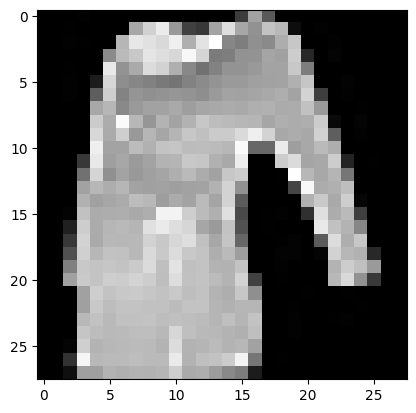

In [12]:
print("b x y c -> ", x.shape)
plt.imshow(x[0,...], cmap="gray");

In [13]:
model.apply(params, key, x, spiking=False)

DeviceArray([[ 0.49045837,  0.32804522,  0.3856396 , ..., -0.0478965 ,
              -0.11704593,  0.01182345],
             [ 0.07235594, -0.08874349,  0.14551952, ...,  0.2911517 ,
               0.06611723,  0.01925142],
             [-0.19301961,  0.05119936, -0.26339725, ...,  0.12291995,
              -0.12575562,  0.22134064],
             ...,
             [ 0.16044085,  0.13906515,  0.08830648, ...,  0.01166629,
              -0.05248075, -0.187418  ],
             [ 0.3184937 , -0.09649571, -0.00215887, ..., -0.13396761,
               0.04695809, -0.13647969],
             [ 0.01672154, -0.15465826,  0.50306684, ..., -0.26757655,
               0.08661724, -0.17403792]], dtype=float32)

In [19]:
x.shape

(128, 28, 28, 1)

In [14]:
spks = model.apply(params, key, x, spiking=True)

Solving layer phasor_dense


100%|██████████| 1001/1001 [00:01<00:00, 620.75it/s]


Solving layer phasor_dense_1


100%|██████████| 1001/1001 [00:00<00:00, 6246.49it/s]


([array([   0,    0,    0, ..., 1279, 1279, 1279])],
 array([0.5 , 1.48, 2.42, ..., 7.7 , 8.71, 9.71]),
 (128, 10))

In [ ]:
#TODO - tuple of spikes to namedtuple?

In [16]:
spks[0]

[array([   0,    0,    0, ..., 1279, 1279, 1279])]

In [18]:
spks[2]

(128, 10)

In [17]:
spks[1]

array([0.5 , 1.48, 2.42, ..., 7.7 , 8.71, 9.71])

In [ ]:
#TODO - decode and test

In [ ]:
type(model)

haiku._src.transform.Transformed

In [ ]:
model.

In [ ]:
?model.index

Signature: model.index(value, start=0, stop=9223372036854775807, /)
Docstring:
Return first index of value.

Raises ValueError if the value is not present.
Type:      builtin_function_or_method


In [ ]:
hk.Transformed

In [ ]:
params_t['phasor_dense'].keys()

dict_keys(['bz', 'w'])

In [ ]:
params_t['phasor_dense']['bz']

DeviceArray([0.97015387, 1.0279953 , 1.0111737 , 1.0650455 , 0.959732  ,
             0.98500216, 1.0141755 , 1.0098482 , 0.9926995 , 1.0238945 ,
             0.9916429 , 0.9819595 , 1.1982105 , 1.0171658 , 1.0124851 ,
             1.0308654 , 1.057037  , 1.0787395 , 0.93215734, 0.995791  ,
             1.0553246 , 1.0224646 , 1.030786  , 1.010359  , 1.0385854 ,
             1.0088099 , 1.091956  , 1.1770277 , 1.0432597 , 1.0288429 ,
             1.0488871 , 0.9767053 , 1.0286292 , 1.081243  , 0.96277773,
             0.9776561 , 1.075314  , 1.0157082 , 1.022045  , 1.0108213 ,
             1.0718731 , 1.0832895 , 0.968945  , 1.0169284 , 1.021121  ,
             1.0311096 , 1.0298604 , 1.0456007 , 1.0328699 , 1.0787151 ,
             0.99673575, 1.0481079 , 1.0406806 , 0.9566109 , 1.0538735 ,
             0.98660976, 1.0604991 , 1.1560222 , 0.9546687 , 0.9917695 ,
             1.0208112 , 1.0474983 , 0.9996649 , 0.9720679 , 1.0541772 ,
             1.0218034 , 0.95868266, 0.957641  , 1.

In [ ]:
params_t['phasor_dense']['w']

DeviceArray([[ 0.06170554,  0.03170085, -0.02159647, ..., -0.03591197,
               0.02377121,  0.01648746],
             [ 0.0359842 , -0.01068914,  0.03900205, ..., -0.00108742,
              -0.00376834,  0.01606862],
             [-0.00776865, -0.01693812, -0.03747998, ...,  0.03230399,
               0.01159014,  0.07565884],
             ...,
             [ 0.07284345,  0.05850352, -0.03309276, ..., -0.00242159,
              -0.0339078 , -0.08026497],
             [ 0.06360696, -0.0166297 , -0.0335381 , ..., -0.03412617,
              -0.00265713,  0.03458536],
             [-0.00765075, -0.0043629 , -0.06331107, ...,  0.00309099,
               0.00628695,  0.0578362 ]], dtype=float32)